In [1]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 1.8 MB/s eta 0:00:0000:0100:01


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


In [6]:
os.getcwd()

'/Users/admin/Documents/GitHub/python_study'

In [11]:
os.chdir(os.path.join(os.getcwd(), 'DATA'))

In [14]:
df_airlines = pd.read_csv('airlines.csv', low_memory=False)
df_airports = pd.read_csv('airports.csv', low_memory=False)
df_flights = pd.read_csv('flights.csv', low_memory=False)

In [20]:
# 데이터 확인
print(df_airlines.head())
print(df_airports.head())
print(df_flights.head())

  IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways
  IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447  
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1   

In [21]:
# 데이터 크기 확인
print(df_airlines.shape)
print(df_airports.shape)
print(df_flights.shape)

(14, 2)
(322, 7)
(5819079, 31)


In [22]:
# 데이터 컬럼 확인
print(df_airlines.columns)
print(df_airports.columns)
print(df_flights.columns)

Index(['IATA_CODE', 'AIRLINE'], dtype='object')
Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')
Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [27]:
# 많이 쓰는 것
x = 'abc'
print(x.startswith('a')) # 시작하는 문자
print(x.endswith('a')) # 끝나는 문자
print(x.find('a')) # a가 몇번째에 있는지
print(x.replace('a', 'b')) # a를 b로 바꿔라
print(x.split('a')) # a를 기준으로 잘라서 리스트로 반환
print(x.upper()) # 대문자로
print(x.index('a')) # a가 몇번째에 있는지

True
False
0
bbc
['', 'bc']
ABC


In [35]:
# 많이 쓰는 것 2
x = 'abc'
print(x.split()) # 공백을 기준으로 잘라서 리스트로 반환
print('%%%'.join(x)) # x를 %%%로 연결

['abc']
a%%%b%%%c


In [36]:
# datetime 사용법
import re
from datetime import datetime as dt
dt.strptime('2023-01-01', '%Y-%m-%d') - dt.strptime('2020-01-01', '%Y-%m-%d')

In [39]:
dt.strptime('2023-01-01', '%Y-%m-%d').strftime('%m/%d/%Y')

'01/01/2023'

In [42]:
# striptime에서 month 추출
dt.strptime('2023-01-01', '%Y-%m-%d').strftime('%m')

'01'

DataFrame Head:


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


DataFrame Tail:


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,14.0,15.0,14.0,28.0,221.0,208.0,189.0,1576,437.0,5.0,440,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
Missing values:


,0
TAIL_NUMBER,14721
DEPARTURE_TIME,86153
DEPARTURE_DELAY,86153
TAXI_OUT,89047
WHEELS_OFF,89047
SCHEDULED_TIME,6
ELAPSED_TIME,105071
AIR_TIME,105071
WHEELS_ON,92513
TAXI_IN,92513


----------------------------------------------------------------------------------------------------
MSNO Matrix:



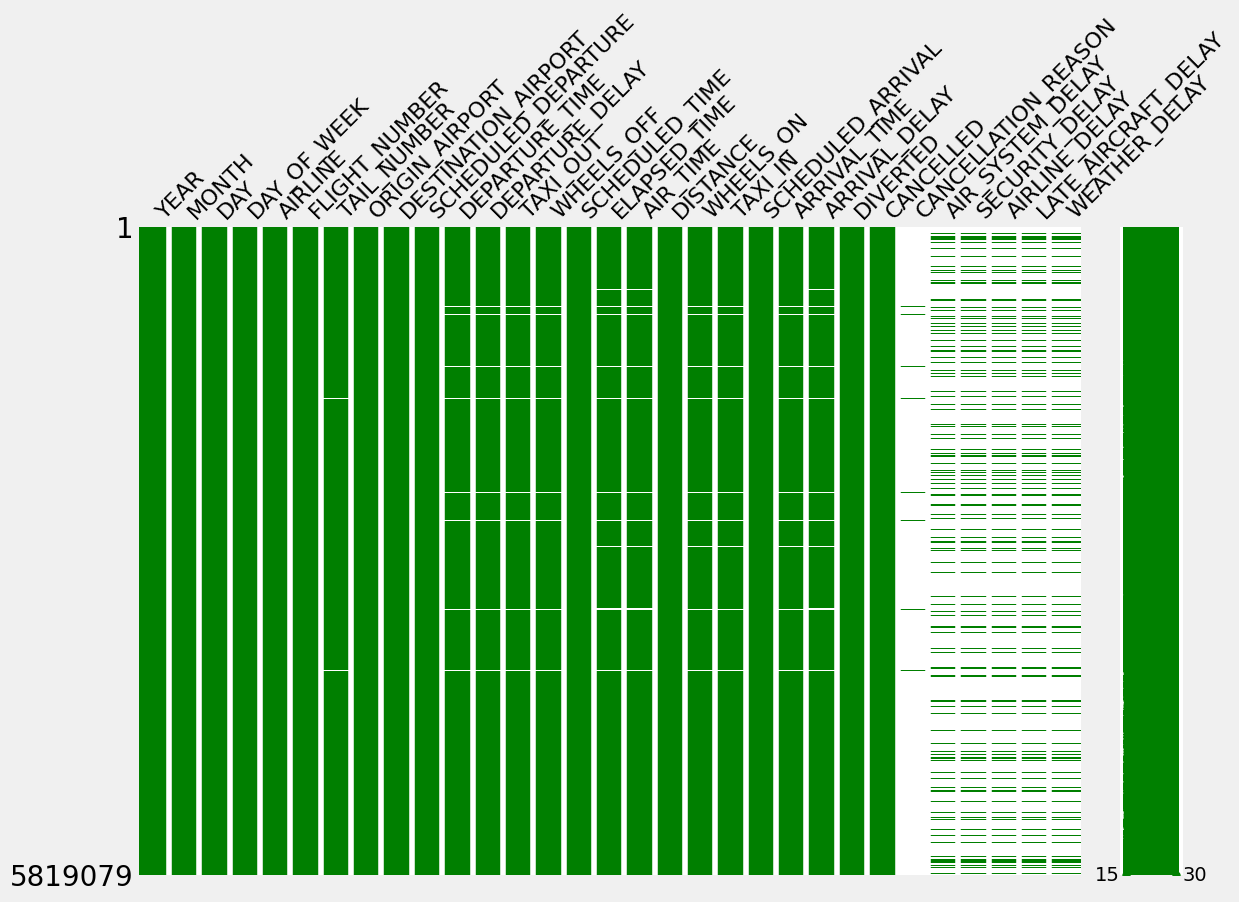

----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(5819079, 31)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME       

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
YEAR,5819079,2015,2015,0,2015,2015,2015,2015,2015,nan,nan
MONTH,5819079,6.524,7,3.405,1,4,7,9,12,0.140692,-1.088801
DAY,5819079,15.705,16,8.783,1,8,16,23,31,0.006453,-1.181836
DAY_OF_WEEK,5819079,3.927,4,1.989,1,2,4,6,7,0.083610,-1.171954
FLIGHT_NUMBER,5819079,2173.093,1690,1757.064,1,730,1690,3230,9855,0.829175,-0.409020
SCHEDULED_DEPARTURE,5819079,1329.602,1325,483.752,1,917,1325,1730,2359,-0.295817,-0.776823
DEPARTURE_TIME,5732926,1335.204,1330,496.423,1,921,1330,1740,2400,-0.521348,-0.217403
DEPARTURE_DELAY,5732926,9.37,-2,37.081,-82,-5,-2,7,1988,4.430288,43.653763
TAXI_OUT,5730032,16.072,14,8.896,1,11,14,19,225,2.676064,10.919873
WHEELS_OFF,5730032,1357.171,1343,498.009,1,935,1343,1754,2400,-0.603747,-0.003050


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



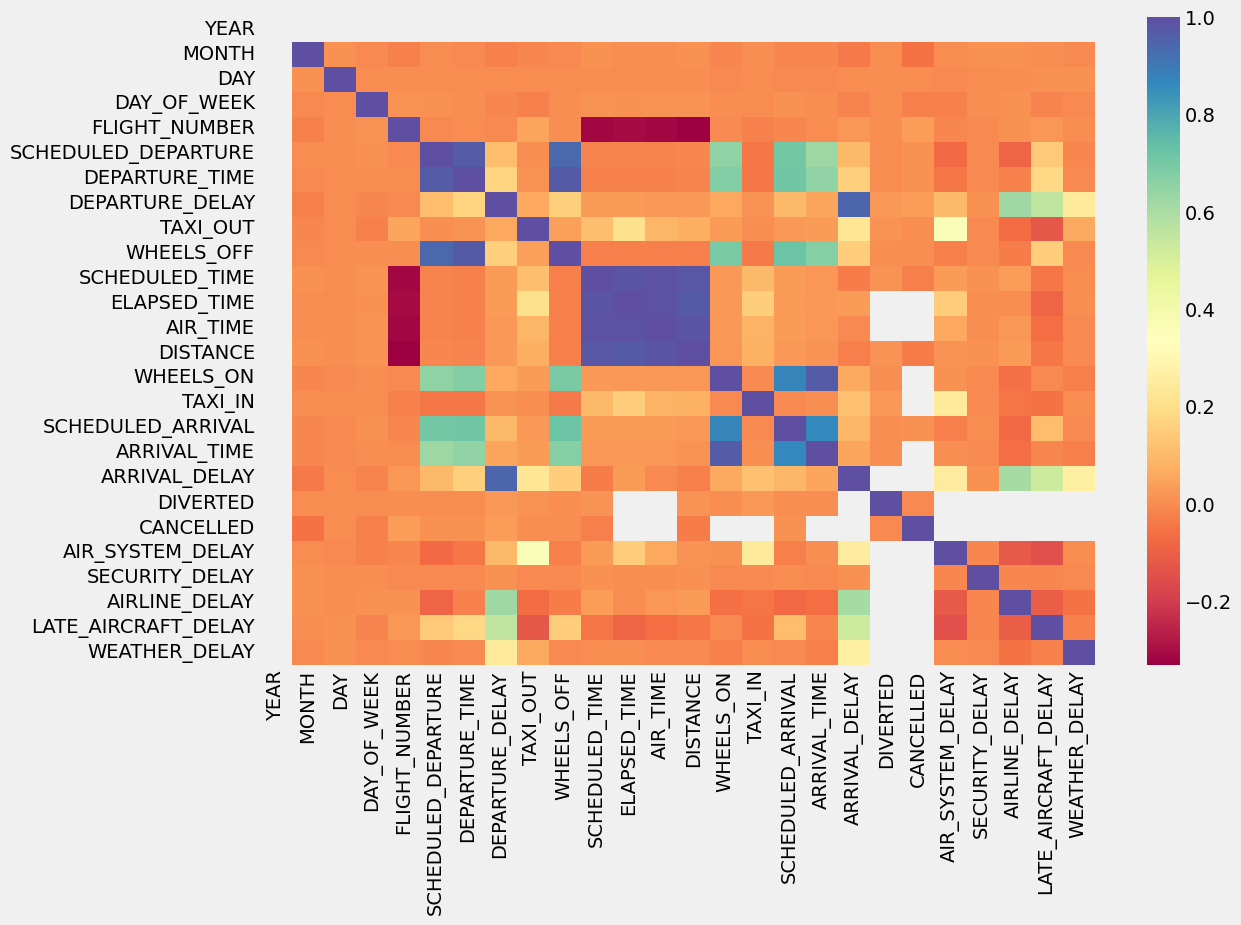

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



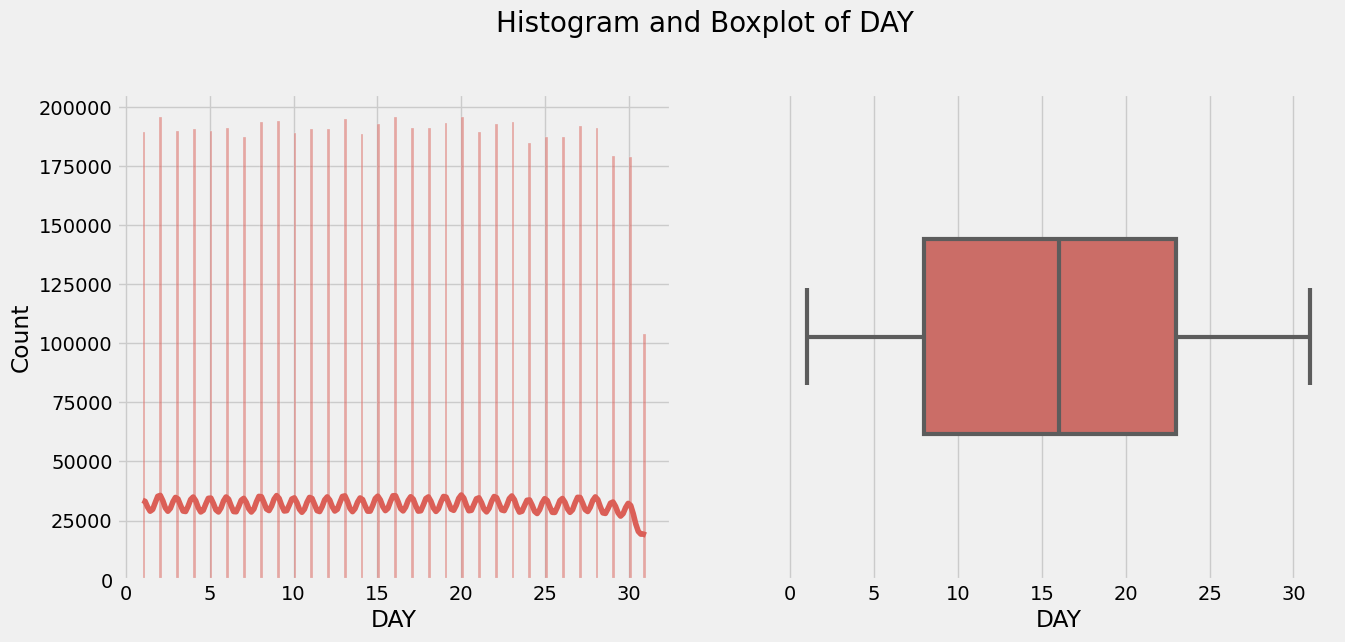

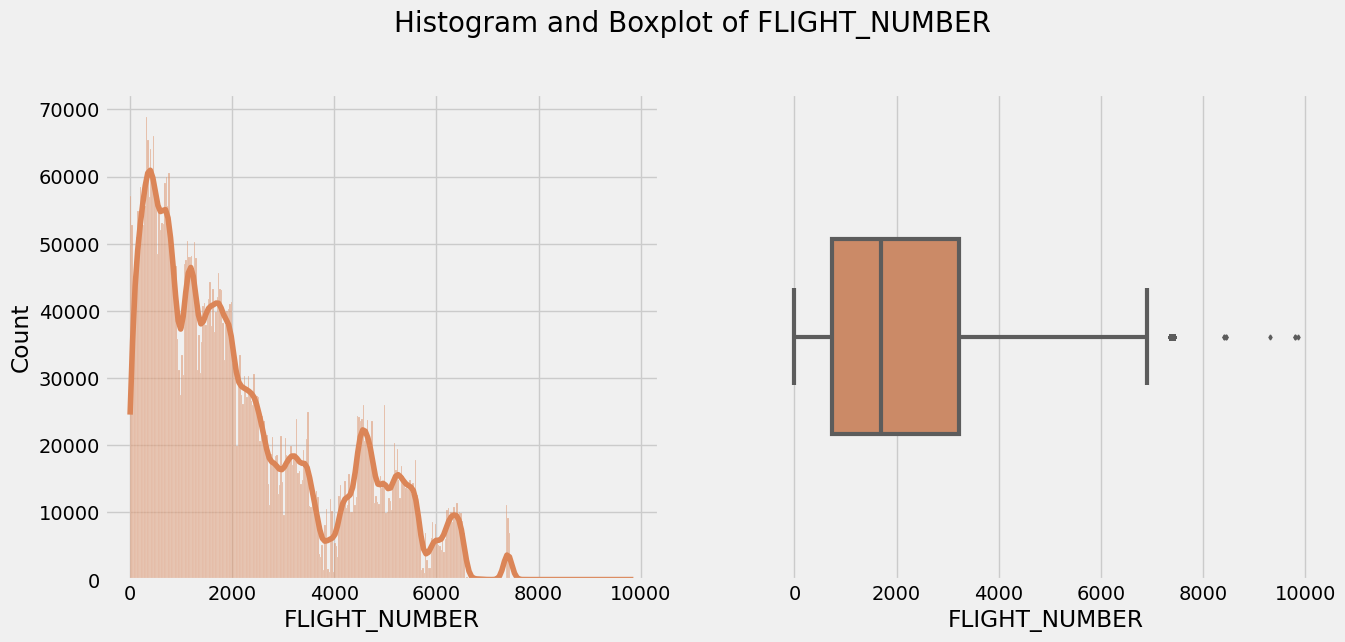

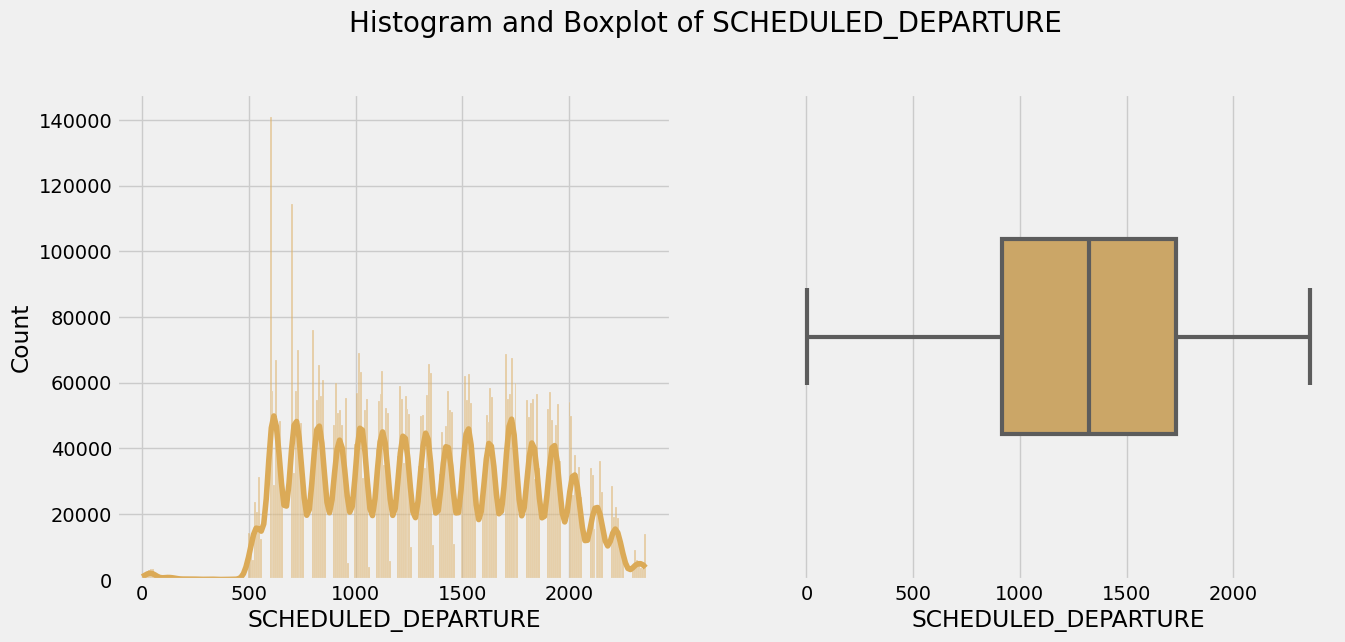

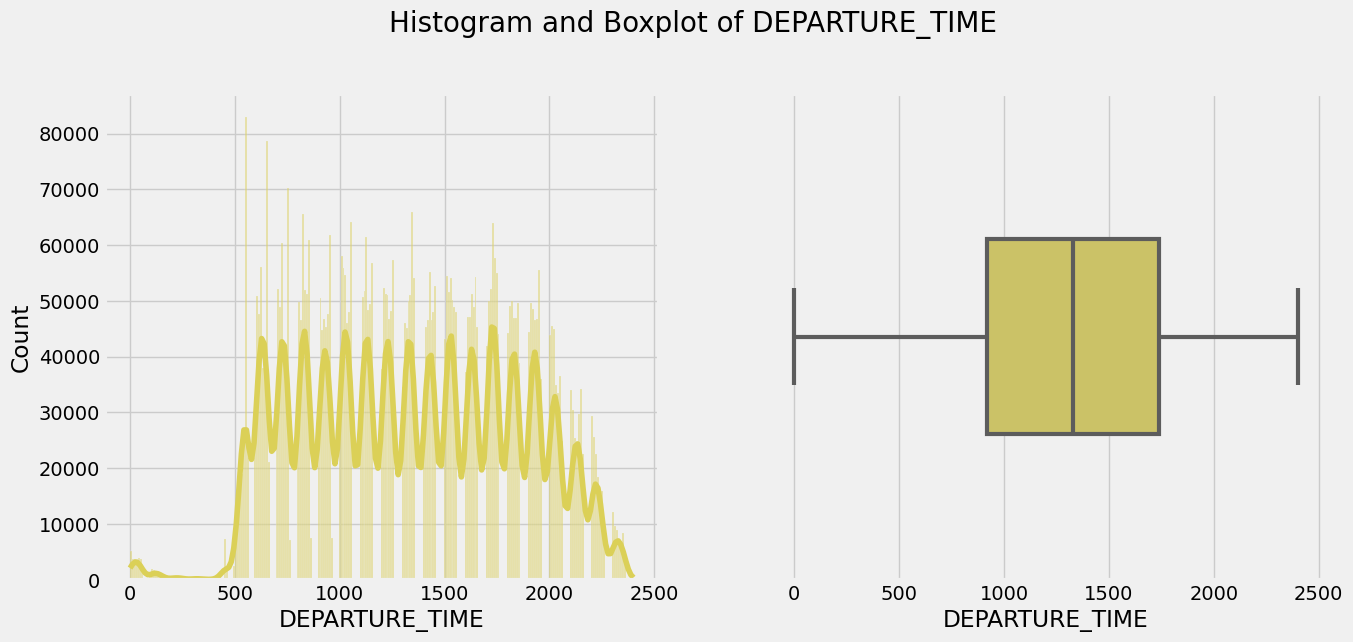

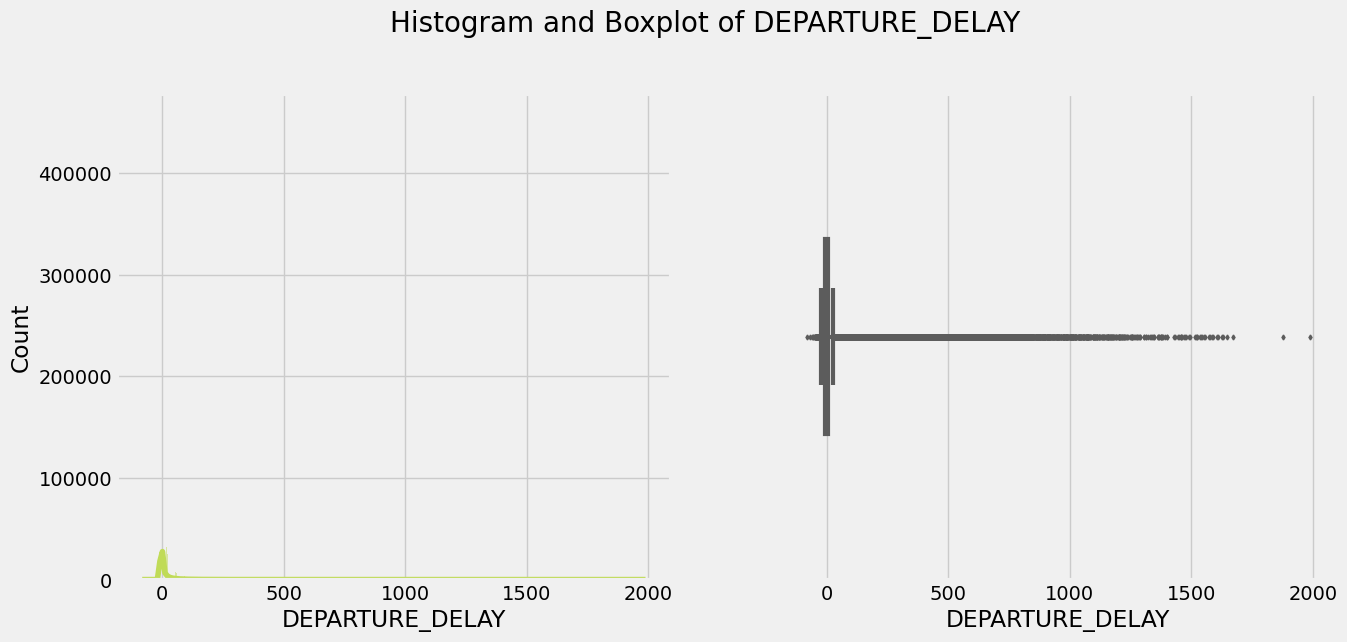

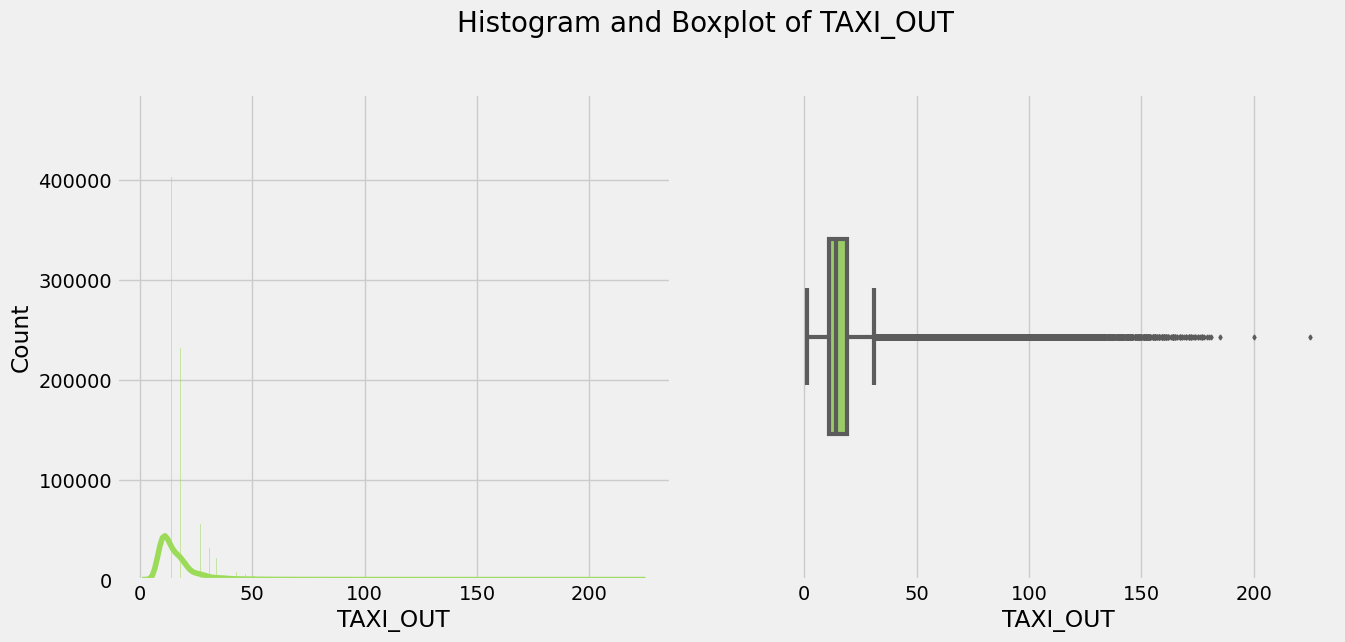

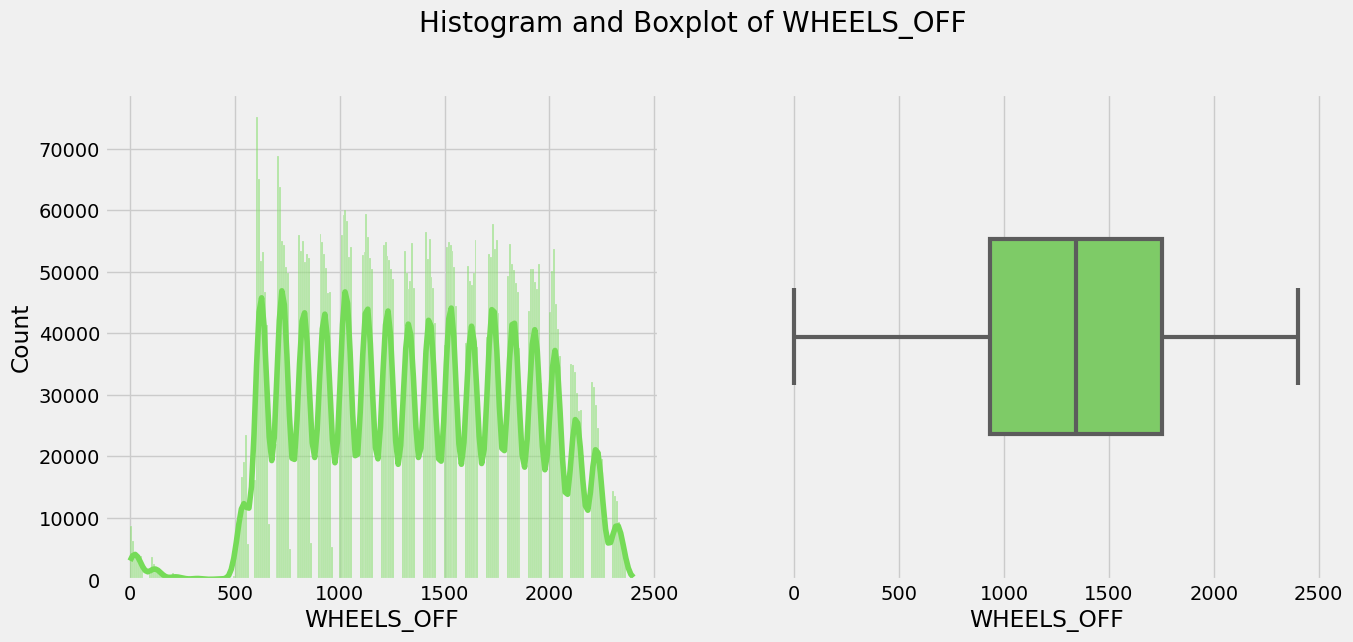

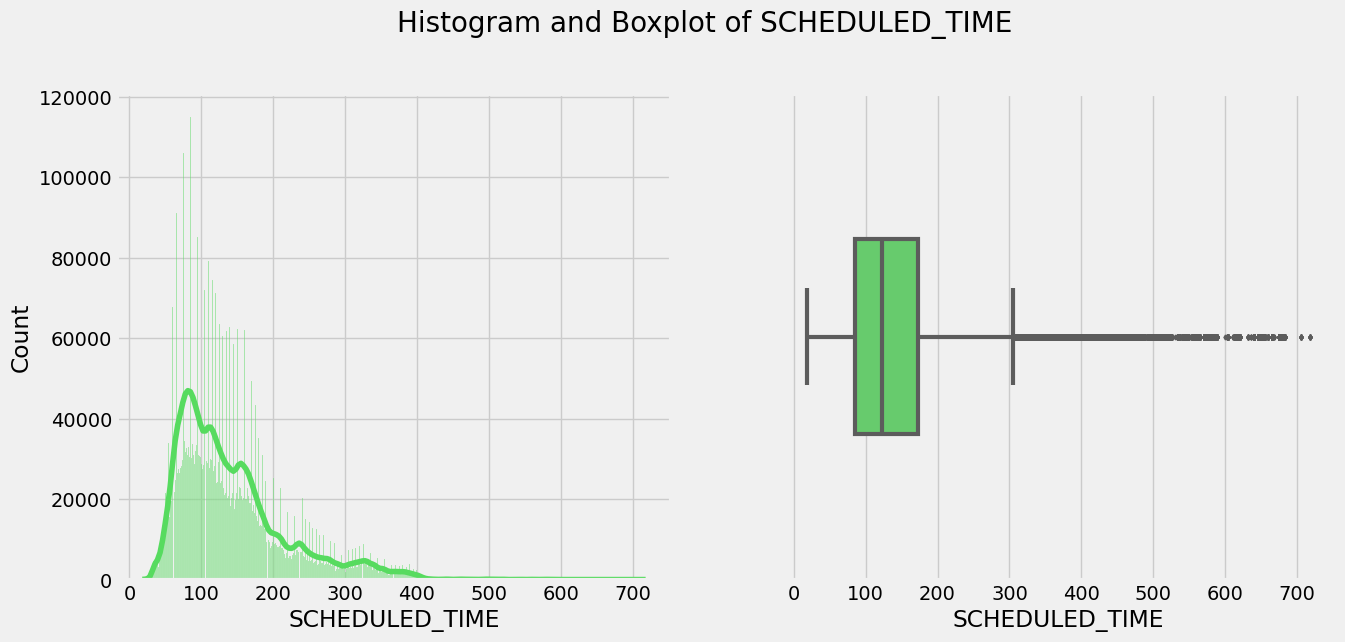

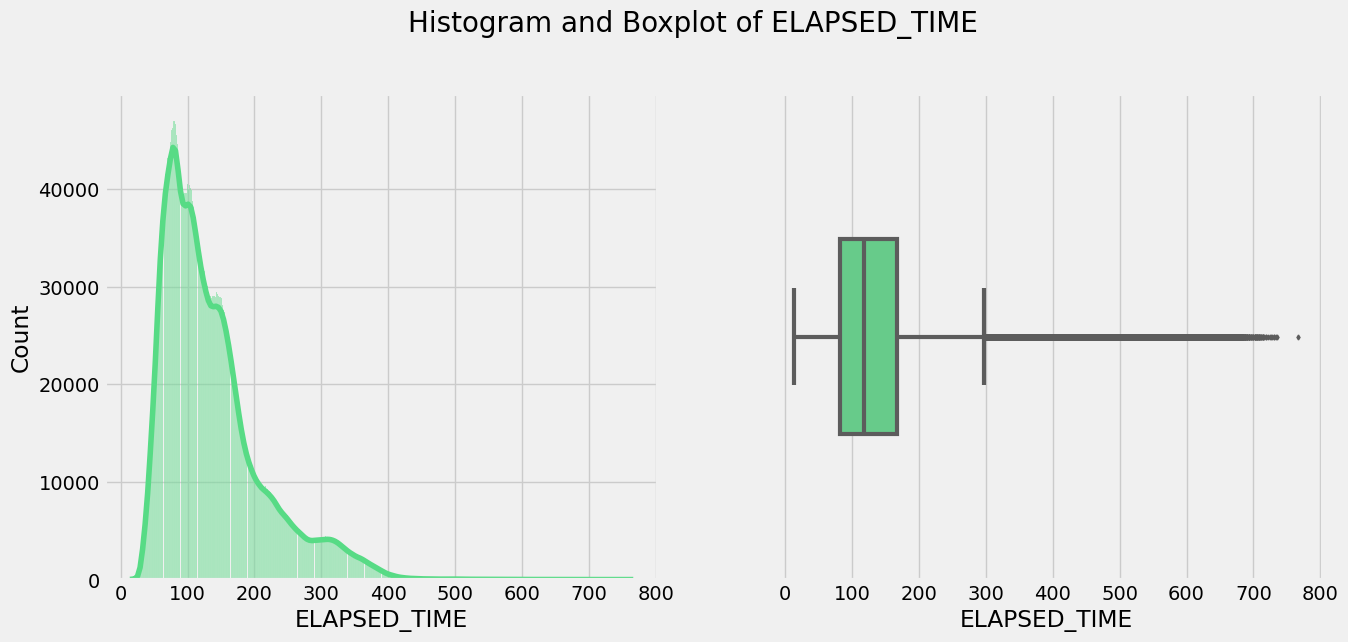

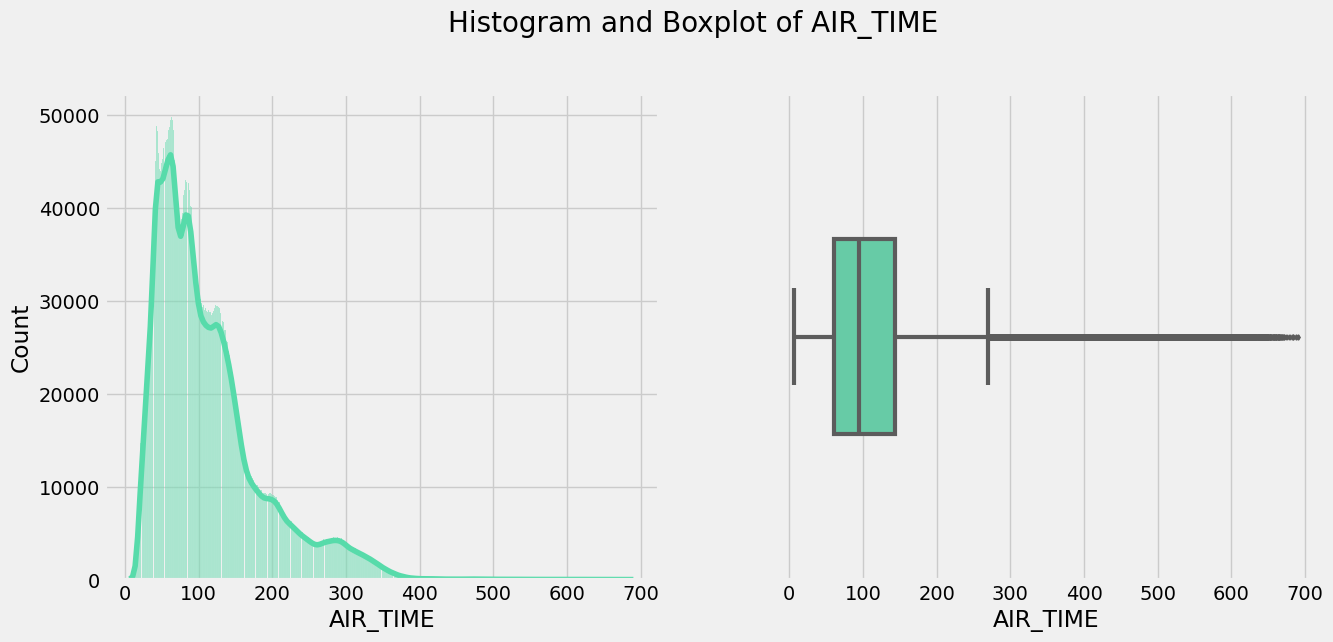

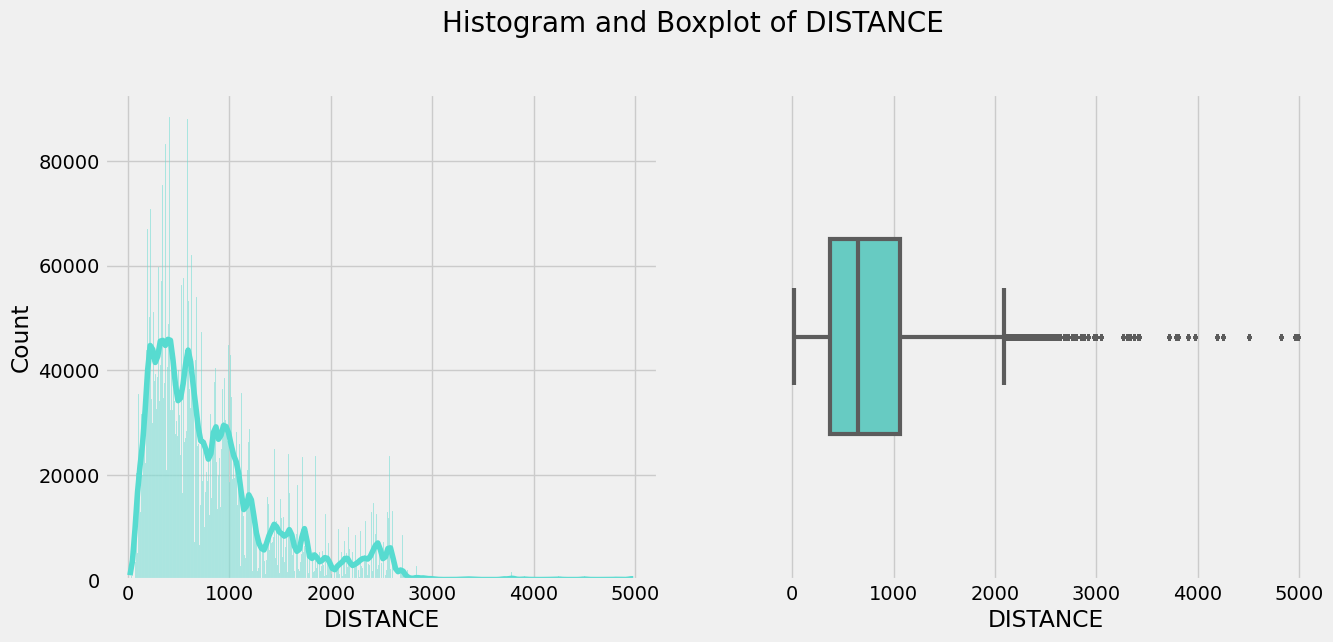

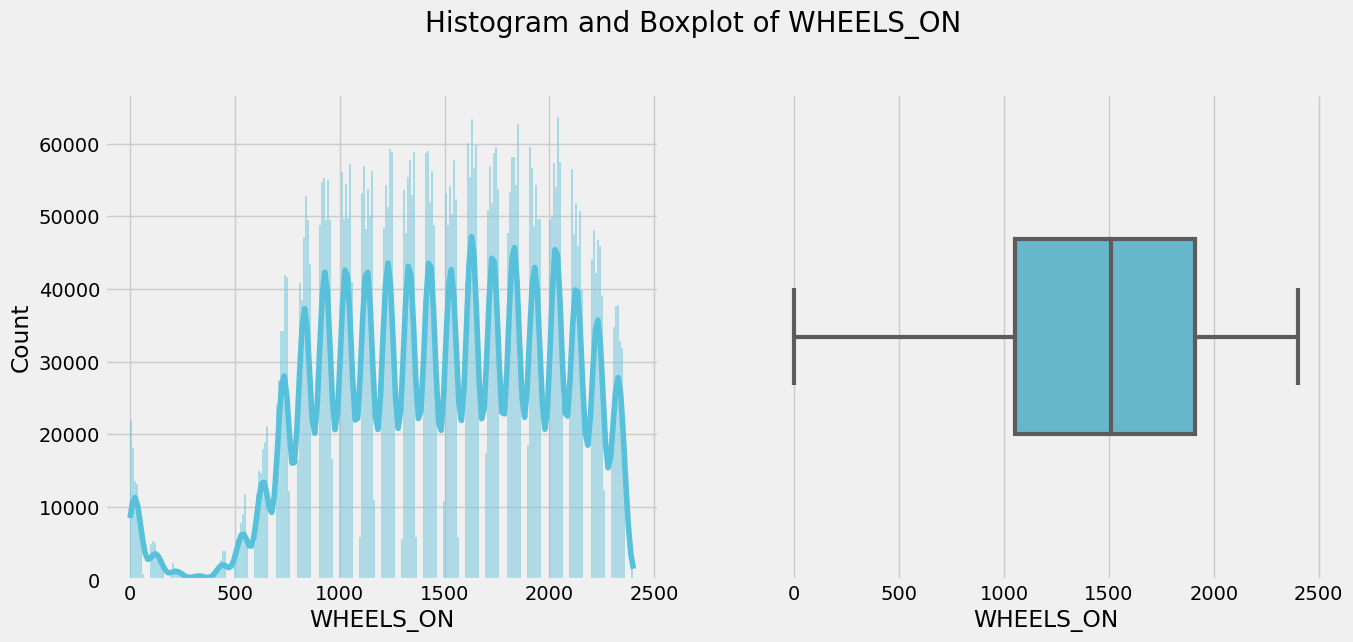

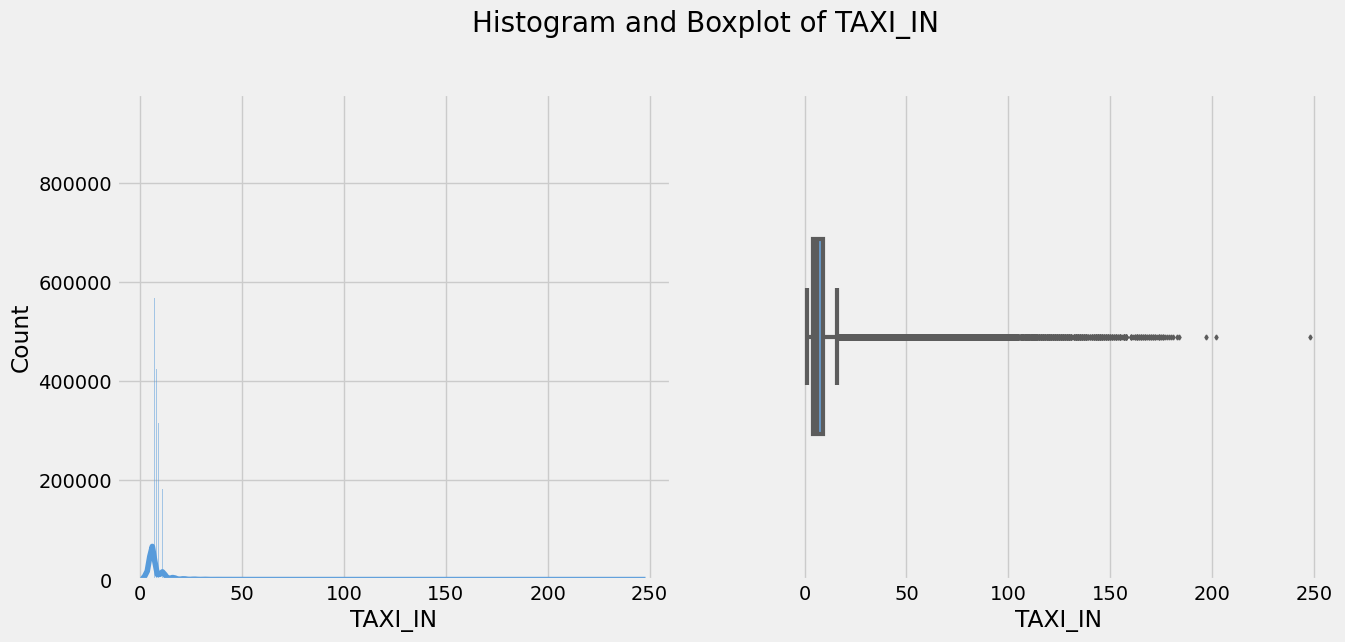

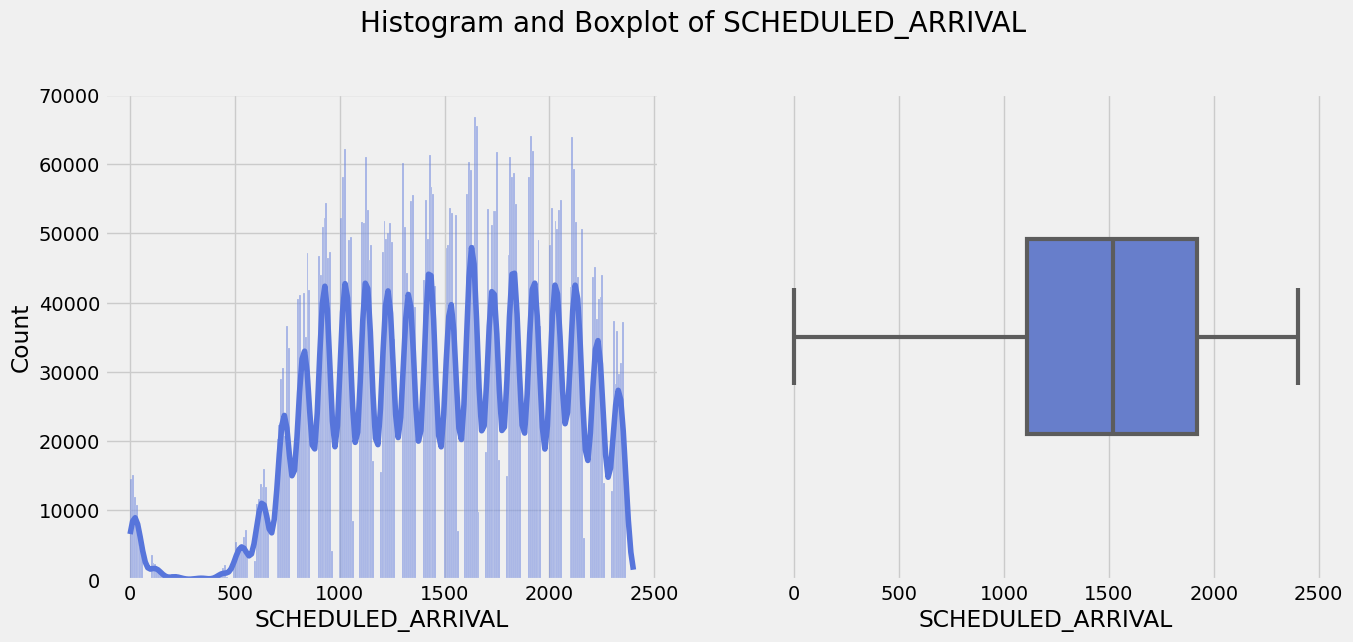

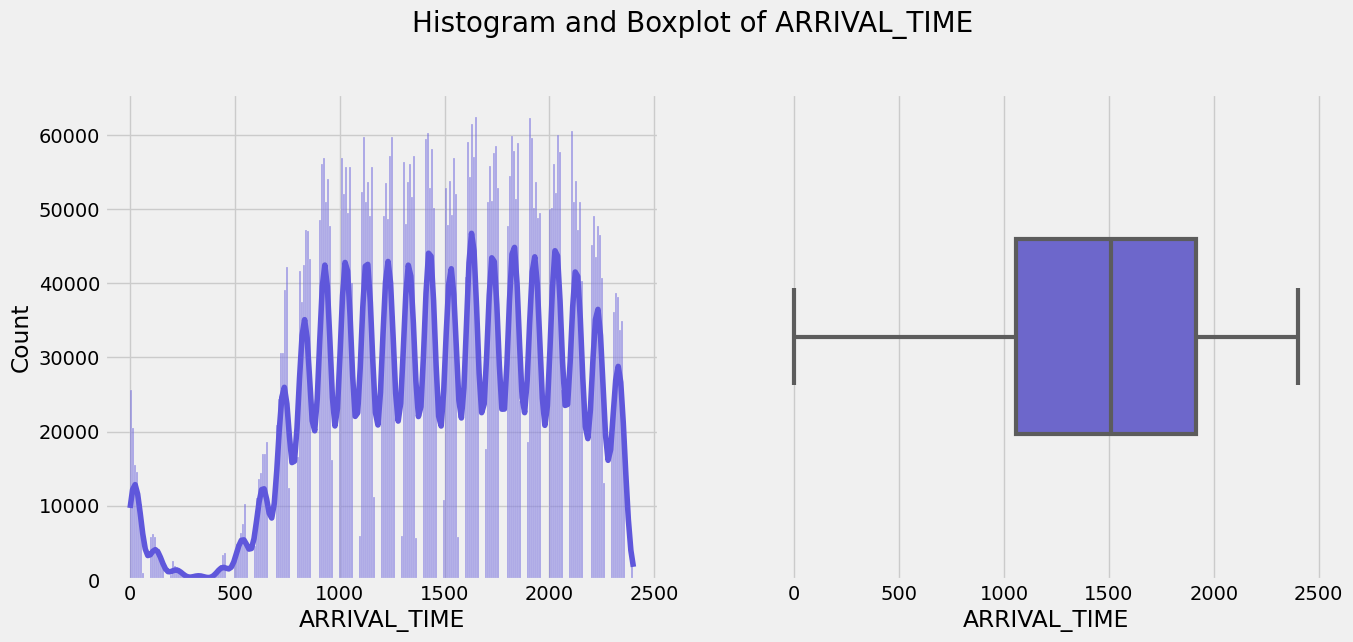

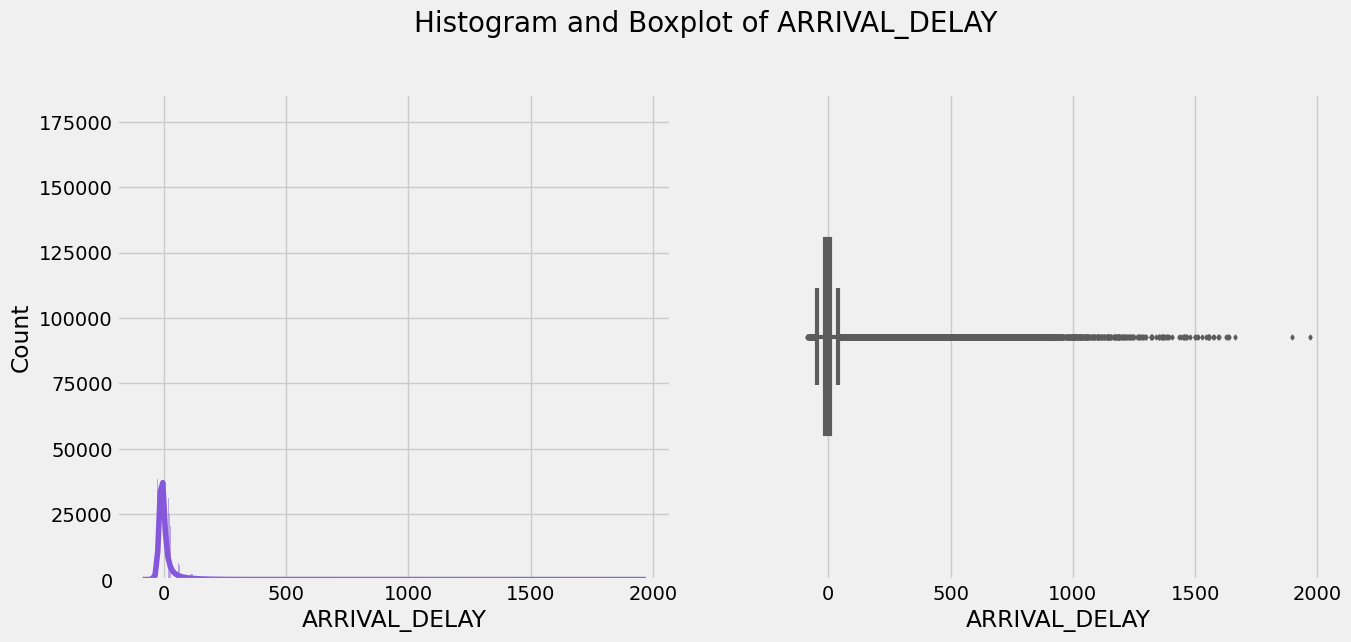

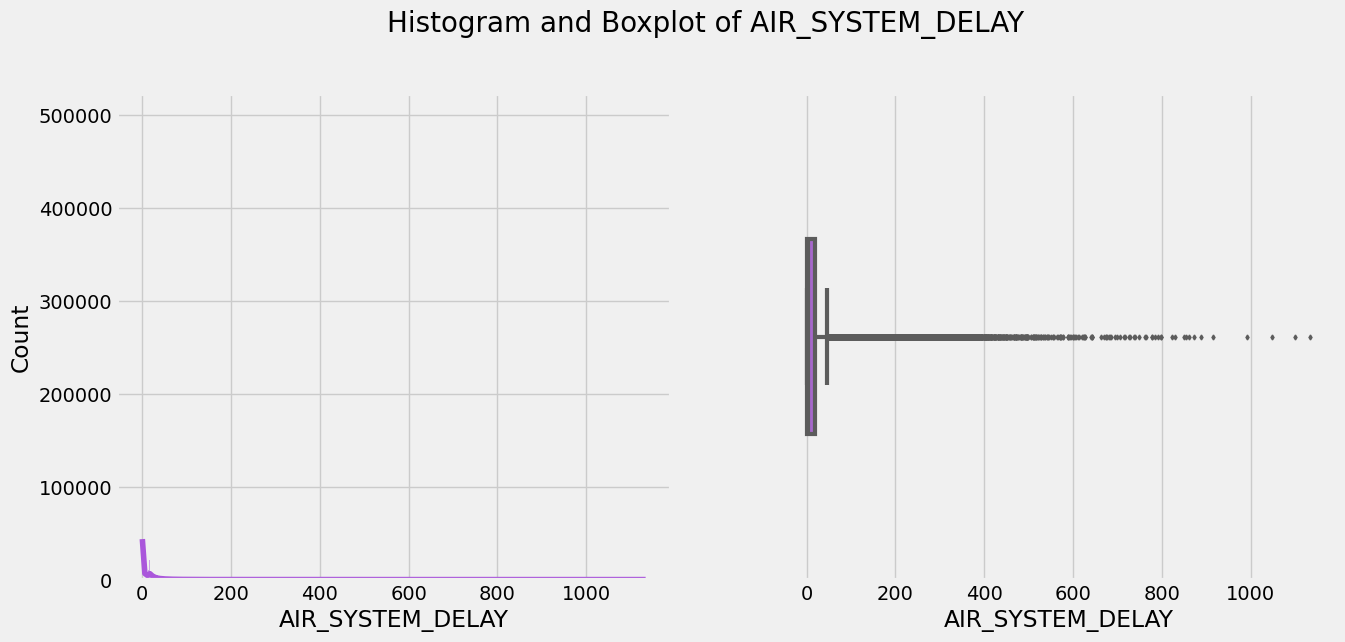

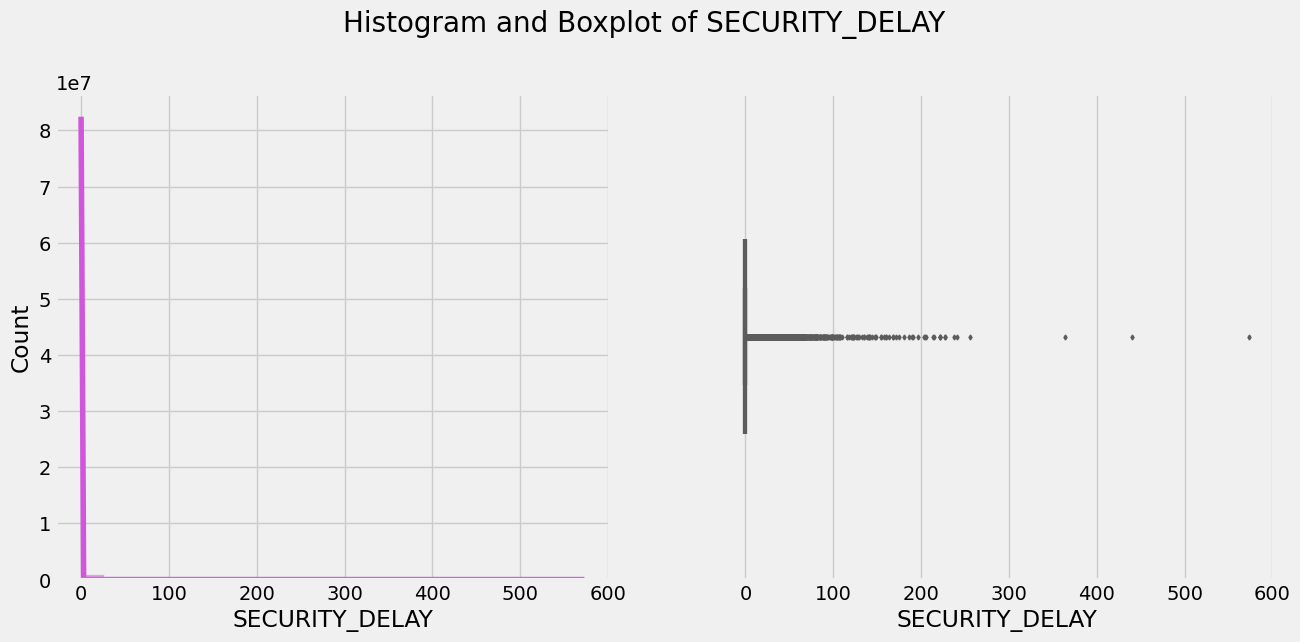

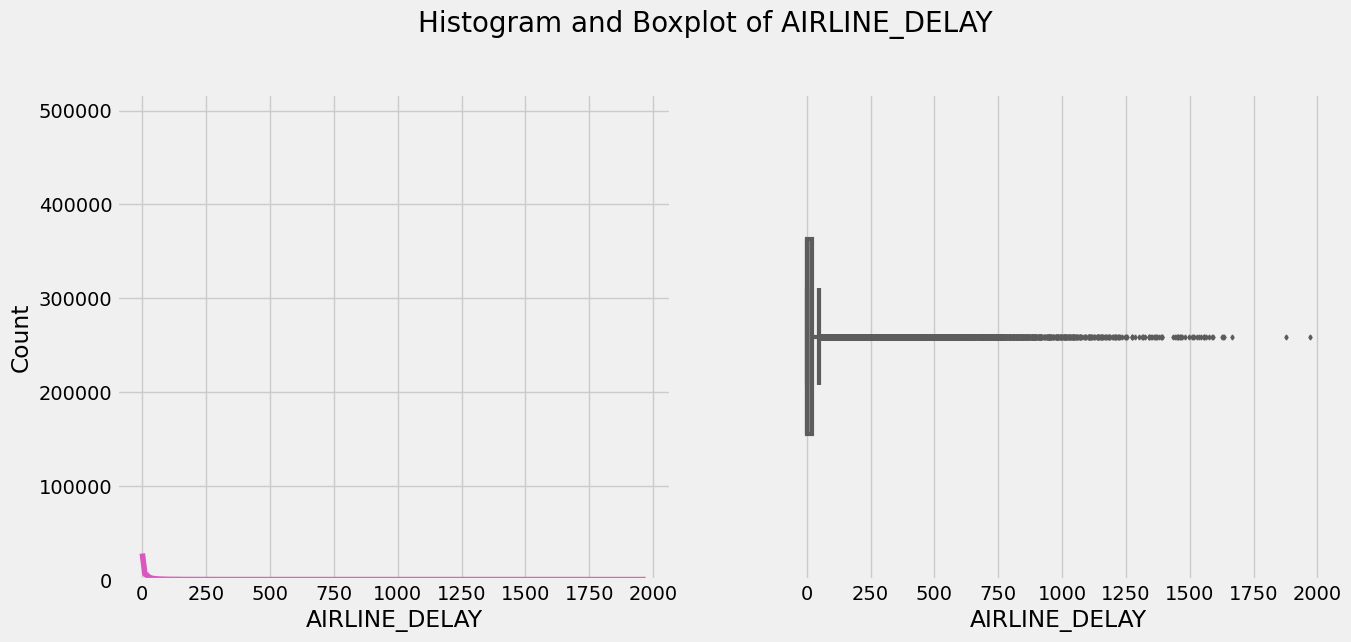

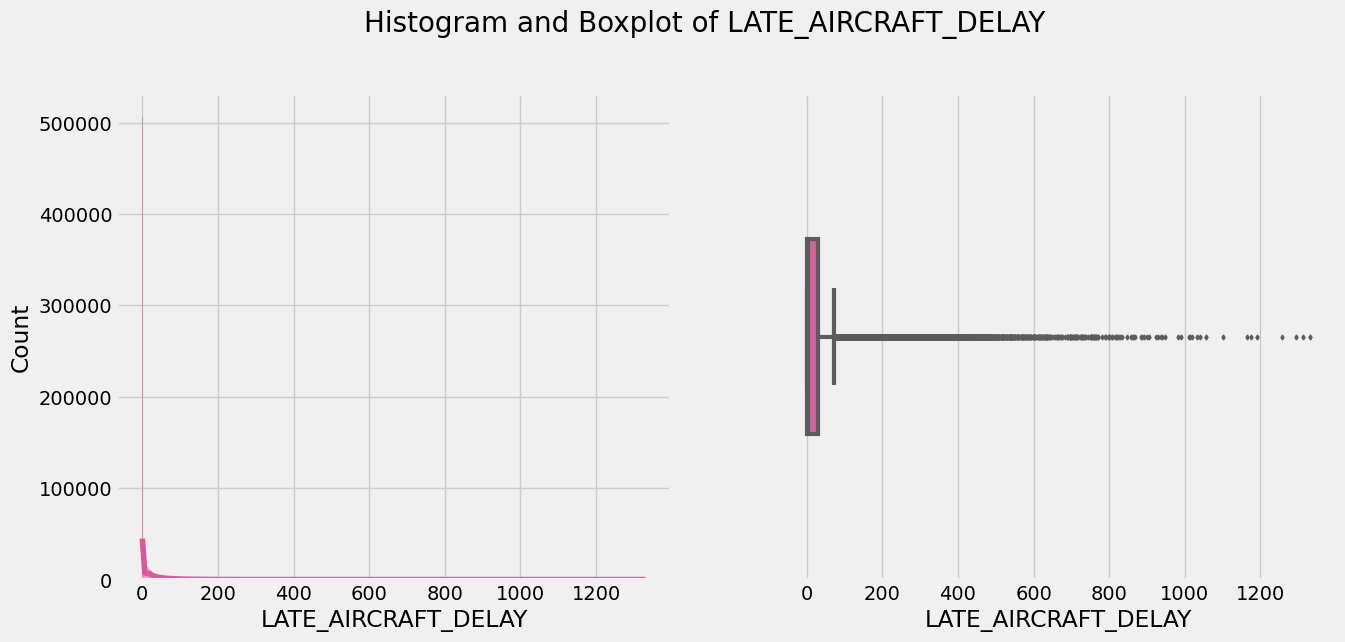

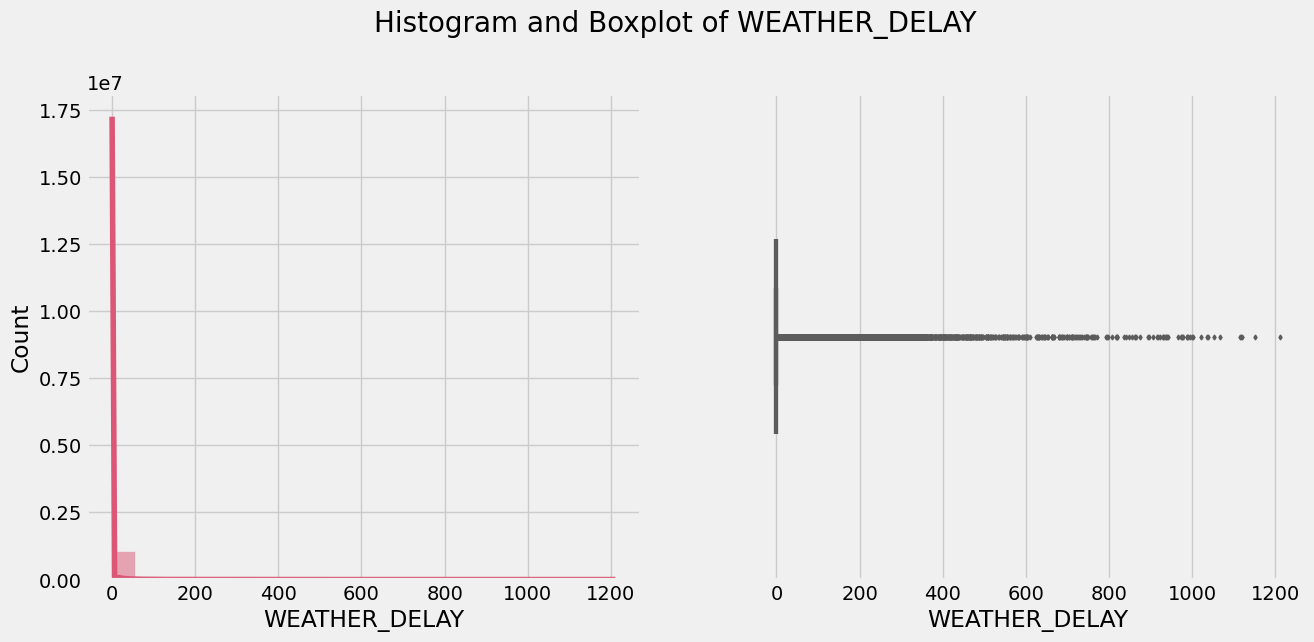

----------------------------------------------------------------------------------------------------
Countplot(s):



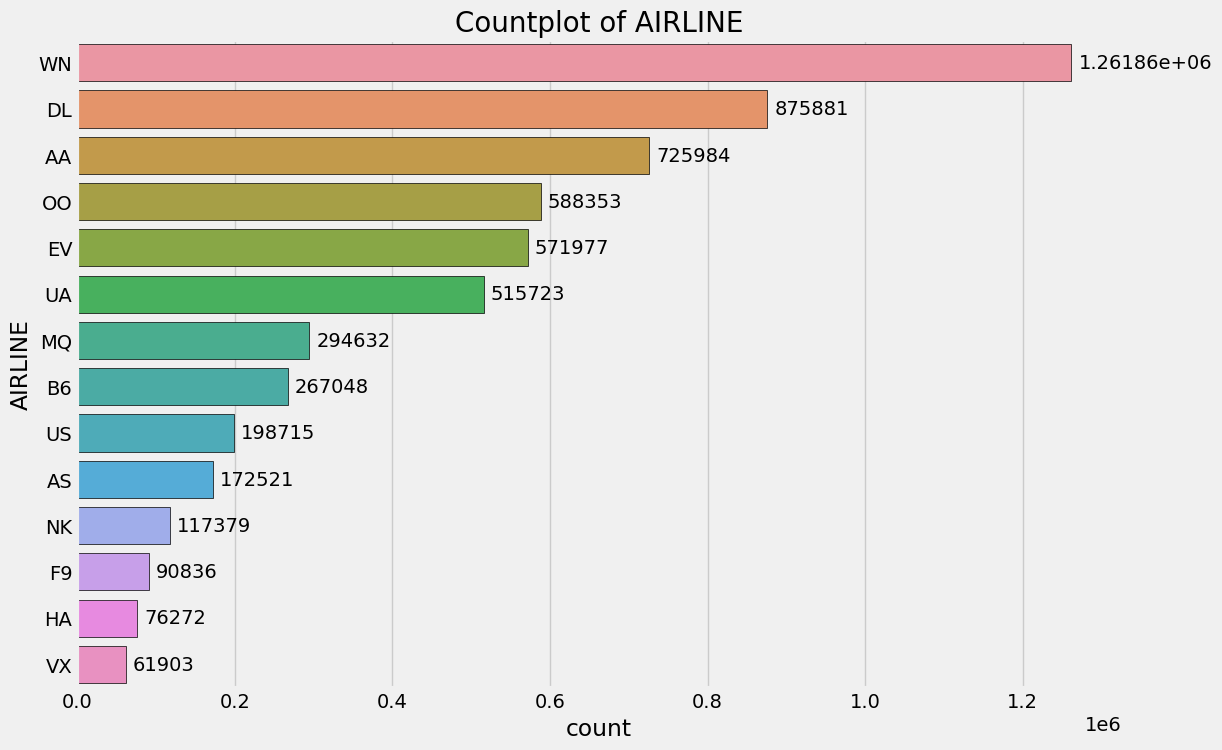

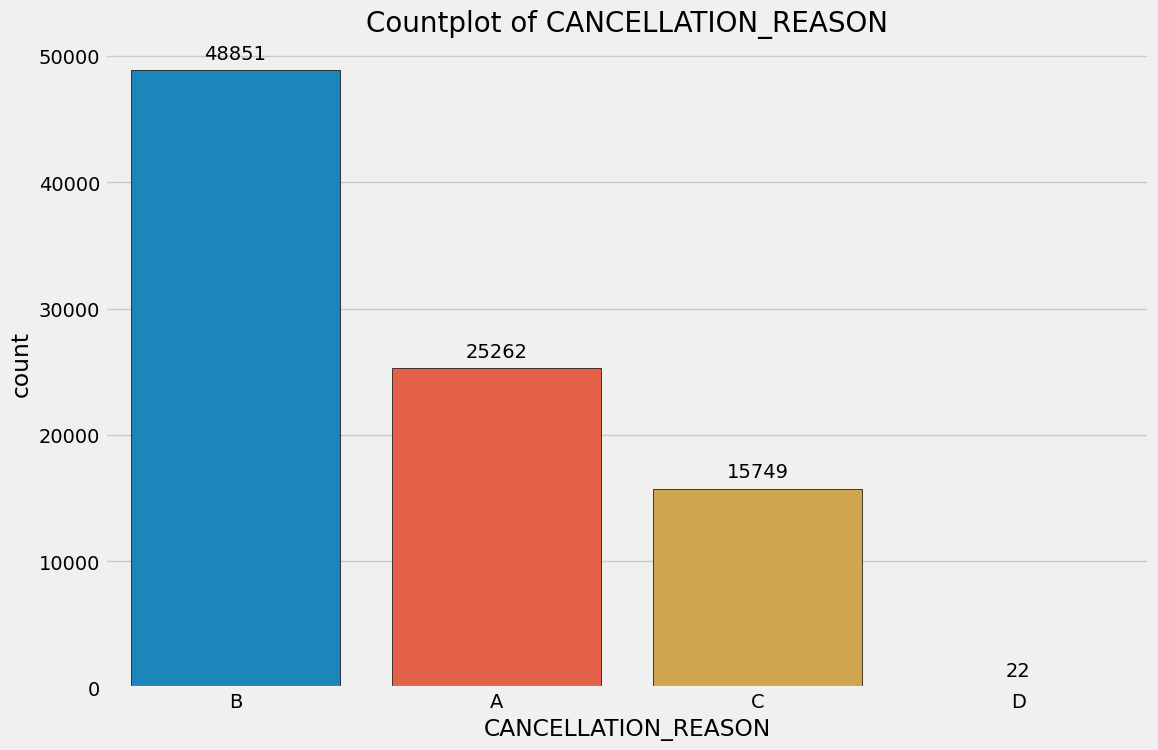

<Figure size 1200x800 with 0 Axes>

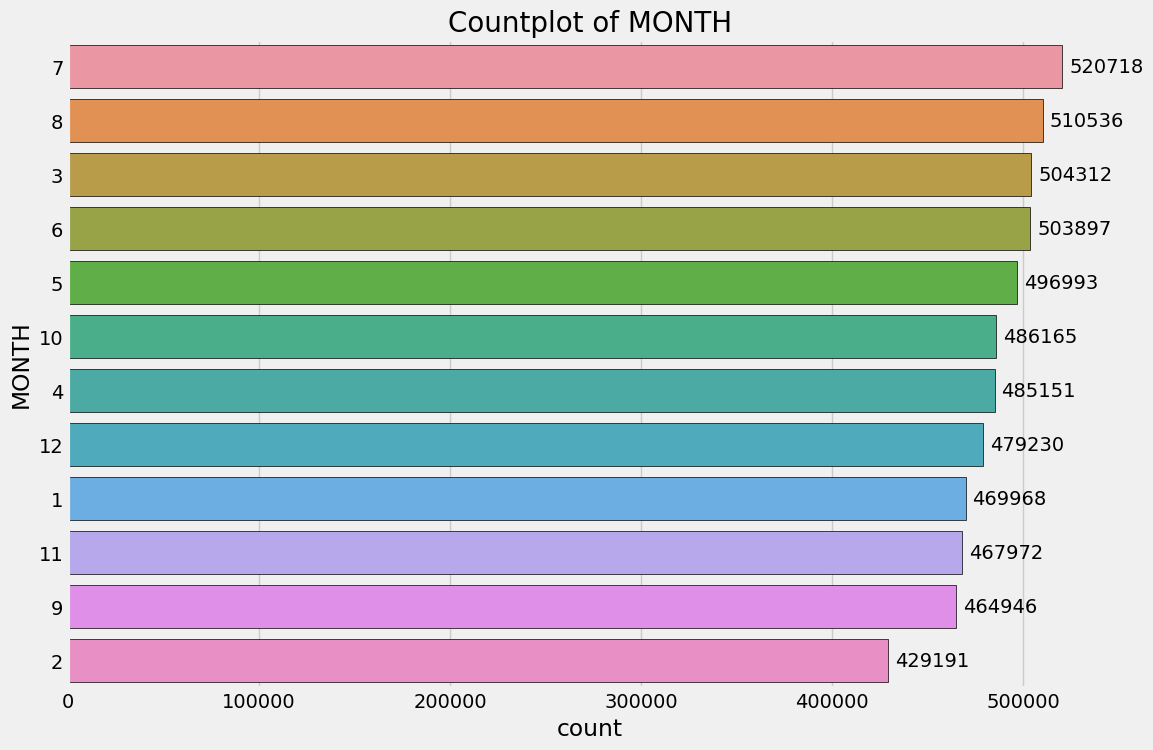

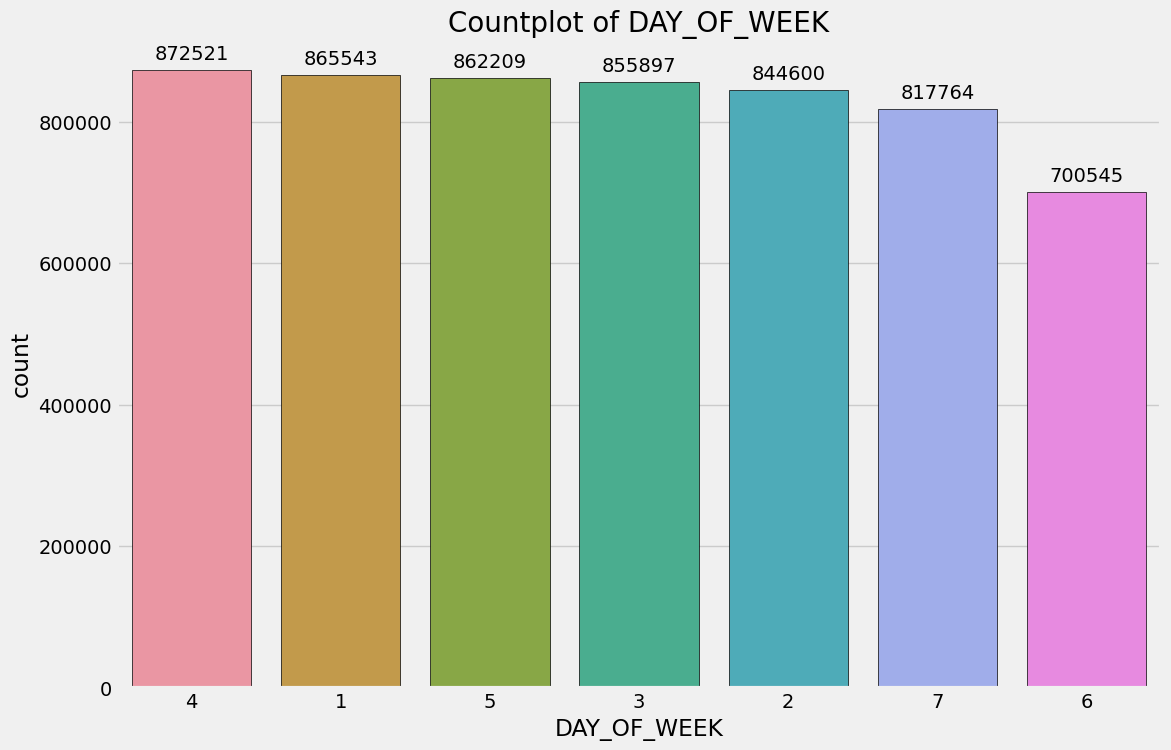

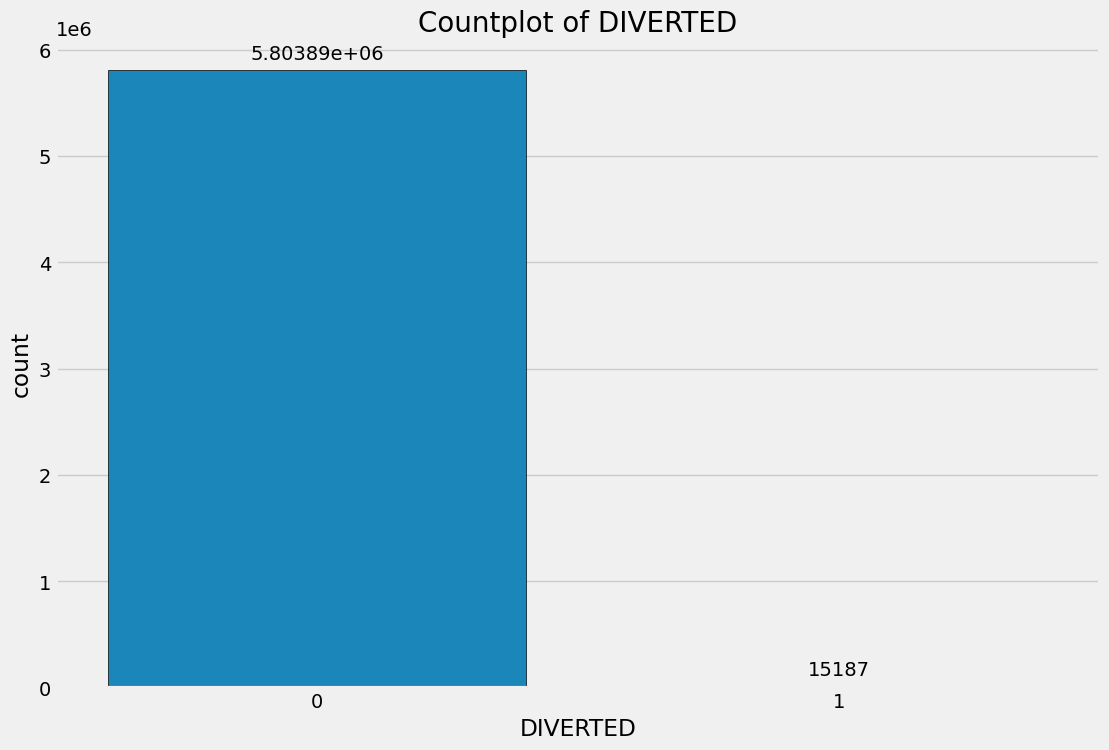

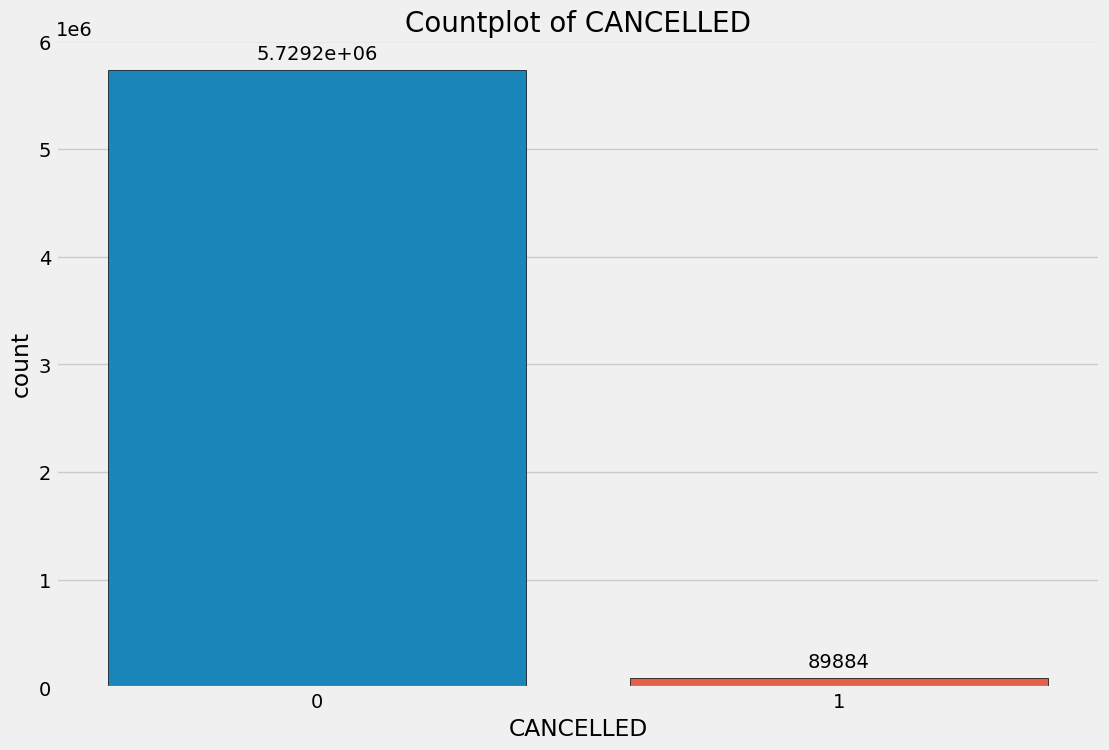

In [46]:
# EDA를 간편하게 해주는 패키지 
# !pip install fasteda
from fasteda import fast_eda
fast_eda(df_flights)